# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

### Importing the Database

In [2]:
df1 = pd.read_csv("ml_datasource.csv")
df2 = df1.copy()
df1.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


### Removing Outliers

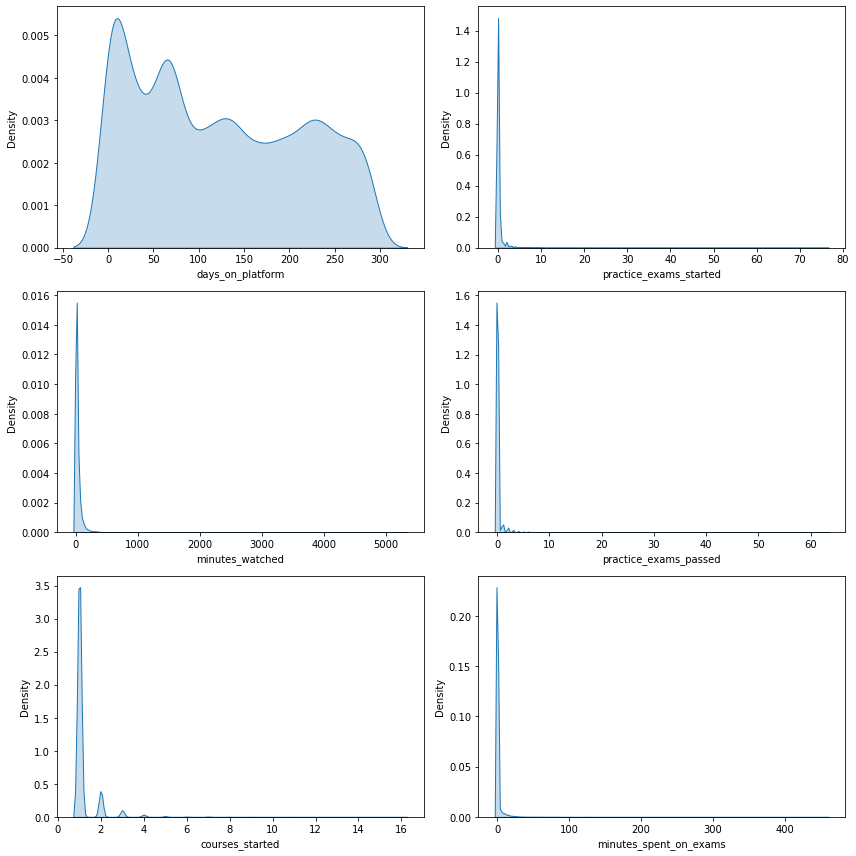

In [3]:
fig, axes = plt.subplots(3,2, figsize=(12,12))

x = df2.drop("purchased", axis=1)
Num_cols = x.select_dtypes(include=["float64","int64"]).columns

for i,j in enumerate(Num_cols):
    if i<3:
        sns.kdeplot(x[j], ax=axes[i, 0], fill=True)
    else:
        sns.kdeplot(x[j], ax=axes[i-3, 1], fill=True)
    
plt.tight_layout()
plt.show()

In [4]:
# Filter

# 1) Minutes_watched <= 1000
# 2) courses_started <= 10
# 3) practice_exams_started <= 10
# 4) minutes_spent_on_exams <= 40

print(df2.shape)
print("==================================================================================================================================================")

df3 = df2[(df2['minutes_watched'] <= 1000) & (df2['courses_started'] <= 10) & (df2['practice_exams_started'] <=10) & (df2['minutes_spent_on_exams']<=40) ]
df3

(17761, 8)


,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0
...,...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0,0.00,0
17757,IN,0,0.1,1,0,0,0.00,0
17758,CM,0,7.8,1,0,0,0.00,0
17759,CA,0,10.4,1,0,0,0.00,0


### Checking for Multicollinearity

In [5]:
# Multicollinearity factor (VIF) determines the correlation of columns with one another

from statsmodels.stats.outliers_influence import variance_inflation_factor

mul_data = df3.drop("student_country", axis=1)
cat_col = df3["student_country"]
removed_column = []

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['variable'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    
    while vif_data['VIF'].max() > 5:
        remove_column = vif_data['variable'].loc[vif_data['VIF'].idxmax()]
        data = data.drop(remove_column, axis=1)
        vif_data = pd.DataFrame()
        vif_data['variable'] = data.columns
        vif_data['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
        removed_column.append(remove_column)
        
    return data

calculate_vif(mul_data)

,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,288,358.1,1,2,15.81,0
1,260,1.7,1,0,16.00,0
2,260,22.4,1,0,0.93,0
3,259,18.8,1,1,14.63,0
4,259,118.0,2,1,16.48,0
...,...,...,...,...,...,...
17756,0,0.8,1,0,0.00,0
17757,0,0.1,1,0,0.00,0
17758,0,7.8,1,0,0.00,0
17759,0,10.4,1,0,0.00,0


In [6]:
x = calculate_vif(mul_data)

for i in range(x.shape[1]):
    print(variance_inflation_factor(x.values,i))

2.492125436190309
1.8137591531608466
3.4983037829786054
2.569372651916071
2.616566478485366
1.2284745734864655


In [7]:
df4 = pd.concat([cat_col, calculate_vif(mul_data)], axis=1)
df4.head(3)

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,15.81,0
1,SG,260,1.7,1,0,16.00,0
2,TR,260,22.4,1,0,0.93,0


### Dealing with NaN Values

In [8]:
df4.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [9]:
df4[df4['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
311,NaN,88,58.1,1,2,11.20,1
337,NaN,86,43.0,1,2,12.96,0
556,NaN,121,241.9,2,3,21.29,0
806,NaN,64,86.4,1,2,4.98,0
1097,NaN,72,67.5,1,1,6.27,0
12363,NaN,84,6.2,1,0,0.00,0
12633,NaN,78,3.0,1,0,0.00,0
16946,NaN,11,8.2,1,0,0.00,0


In [10]:
df4.fillna({"student_country":"NAM"}, inplace=True)
df4.isnull().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

### Splitting the Data

In [11]:
x = df4.drop("purchased", axis=1)
y = df4["purchased"]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=365)

In [12]:
xtest

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams
14179,IN,58,67.2,1,0,0.0
14921,US,14,36.9,1,0,0.0
6175,NL,209,0.8,1,0,0.0
15134,US,38,1.2,1,0,0.0
14708,BD,48,65.4,4,0,0.0
...,...,...,...,...,...,...
2666,DE,272,12.1,2,0,0.0
8417,SA,163,28.8,1,0,0.0
2486,PL,276,7.3,1,0,0.0
8034,US,171,1.2,1,0,0.0


### Encoding the Data

In [13]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=170)

xtrain['student_cont_enc'] = enc.fit_transform(xtrain['student_country'].to_numpy().reshape(-1,1))

xtest['student_cont_enc'] = enc.transform(xtest['student_country'].to_numpy().reshape(-1,1))

xtrain.drop("student_country", axis=1, inplace=True)
xtest.drop("student_country", axis=1, inplace=True)

In [14]:
xtrain.head(2)

,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,student_cont_enc
3861,249,24.6,1,0,0.0,44.0
14883,44,0.1,1,0,0.0,154.0


In [15]:
x_train_array = np.asarray(xtrain, dtype='float')
x_test_array = np.asarray(xtest, dtype='float')

print(x_train_array.shape)
print(x_test_array.shape)

(14100, 6)
(3526, 6)


In [16]:
y_train_array = np.asarray(ytrain, dtype='int')
y_test_array = np.asarray(ytest, dtype='int')

print(y_train_array.shape)
print(y_test_array.shape)

(14100,)
(3526,)


In [17]:
xtrain.isnull().sum()

days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
student_cont_enc          0
dtype: int64

# Creating a Logistic Regression Model

In [18]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

x_train_array2 = sm.add_constant(x_train_array)
results = sm.Logit(y_train_array, x_train_array2)
results2 = results.fit()

print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.150955
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14093
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Nov 2023   Pseudo R-squ.:                  0.5043
Time:                        15:19:51   Log-Likelihood:                -2128.5
converged:                       True   LL-Null:                       -4293.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1963      0.118    -10.146      0.000      -1.427      -0.965
x1            -0.0635      0

In [19]:
# Logistic regression model 1

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

lr = LogisticRegression()
lr.fit(x_train_array, y_train_array)

ypred = lr.predict(x_test_array)
cm = confusion_matrix(y_test_array, ypred)
print(cm, "\n")

print(accuracy_score(y_test_array, ypred))

[[3143   40]
 [ 160  183]] 

0.9432785025524674


In [20]:
# Logistic regression model 2

lr2 = sm.Logit(y_train_array, x_train_array)
lr3 = lr2.fit()

ypred = [round(lr3.predict(x_test_array)[i], 0) for i in range(len(y_test_array))]        # predict probability

cm = confusion_matrix(y_test_array, ypred)
print(cm, "\n")

print(accuracy_score(y_test_array, ypred))

Optimization terminated successfully.
         Current function value: 0.154634
         Iterations 10
[[3150   33]
 [ 146  197]] 

0.9492342597844583


In [35]:
# Logistic regression model 2

lr2 = sm.Logit(ytrain, xtrain)
lr3 = lr2.fit()

ypred = round(lr3.predict(xtest),0)       # predict probability

cm = confusion_matrix(y_test_array, ypred)
print(cm, "\n")

print(accuracy_score(y_test_array, ypred))

Optimization terminated successfully.
         Current function value: 0.154634
         Iterations 10
[[3150   33]
 [ 146  197]] 

0.9492342597844583


# Creating a K-Nearest Neighbors Model

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

para = {
    'n_neighbors': np.arange(1,51),
    'weights': ['uniform', 'distance']
}

gscv = GridSearchCV(KNeighborsClassifier(), para, scoring='accuracy')
gscv.fit(x_train_array, y_train_array)

print(gscv.best_params_)

{'n_neighbors': 19, 'weights': 'distance'}


In [22]:
knn_model = KNeighborsClassifier(**gscv.best_params_).fit(x_train_array, y_train_array)
ypred = knn_model.predict(x_test_array)
cm = confusion_matrix(y_test_array, ypred)
print(cm,"\n")

print(classification_report(y_test_array, ypred), "\n")

print(accuracy_score(y_test_array, ypred))

[[3118   65]
 [  99  244]] 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3183
           1       0.79      0.71      0.75       343

    accuracy                           0.95      3526
   macro avg       0.88      0.85      0.86      3526
weighted avg       0.95      0.95      0.95      3526
 

0.9534883720930233


# Creating a Support Vector Machines Model

In [23]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))

x_train_scaled = scalar.fit_transform(x_train_array)
x_test_scaled = scalar.transform(x_test_array)

In [24]:
from sklearn.svm import SVC
svm_model = SVC()

para = {"gamma":["scale","auto"],
        "C":np.arange(1,11),
        "kernel":["linear", "poly", "rbf"]
       }

gscv = GridSearchCV(SVC(), para, scoring="accuracy", cv=5)
gscv.fit(x_train_scaled, y_train_array)
gscv.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

In [25]:
best_svm = SVC(**gscv.best_params_)
best_svm.fit(x_train_scaled, y_train_array)

ypred = best_svm.predict(x_test_scaled)
cm = confusion_matrix(y_test_array, ypred)
print(cm,"\n")

print(classification_report(y_test_array, ypred), "\n")

print(accuracy_score(y_test_array, ypred))

[[3142   41]
 [ 112  231]] 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3183
           1       0.85      0.67      0.75       343

    accuracy                           0.96      3526
   macro avg       0.91      0.83      0.86      3526
weighted avg       0.95      0.96      0.95      3526
 

0.9566080544526375


# Creating a Decision Trees Model

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

params = {'ccp_alpha':[0, 0.001, 0.002, 0.003, 0.004, 0.005]}

gscv = GridSearchCV(DecisionTreeClassifier(random_state=365), params, scoring='accuracy', cv=5)
gscv.fit(x_train_array, y_train_array)
DT = gscv.best_estimator_
gscv.best_params_

{'ccp_alpha': 0.003}

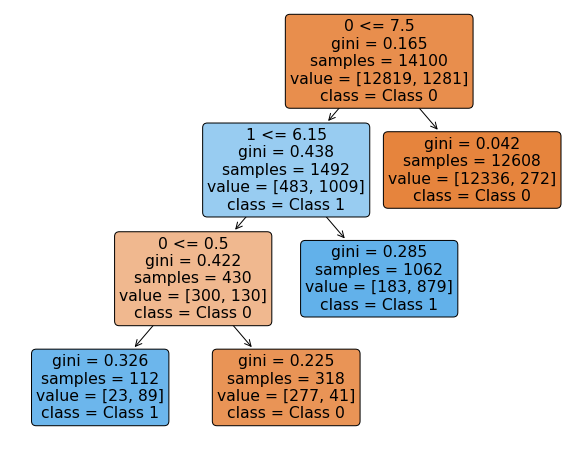

In [28]:
plt.figure(figsize=(10,8))
plot_tree(DT, filled=True, feature_names=list(range(x_train_array.shape[1])), class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()

In [29]:
best_DT = DecisionTreeClassifier(**gscv.best_params_)
best_DT.fit(x_train_array, y_train_array)
ypred = best_DT.predict(x_test_array)

cm = confusion_matrix(y_test_array, ypred)
print(cm,"\n")

print(classification_report(y_test_array, ypred), "\n")

print(accuracy_score(y_test_array, ypred))

[[3125   58]
 [  91  252]] 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3183
           1       0.81      0.73      0.77       343

    accuracy                           0.96      3526
   macro avg       0.89      0.86      0.87      3526
weighted avg       0.96      0.96      0.96      3526
 

0.9577424844015882


In [30]:
xtrain

,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,student_cont_enc
3861,249,24.6,1,0,0.00,44.0
14883,44,0.1,1,0,0.00,154.0
360,246,0.4,2,0,9.40,119.0
15726,29,6.3,1,0,0.00,44.0
472,73,45.4,1,2,3.71,108.0
...,...,...,...,...,...,...
8754,155,16.9,1,0,0.00,67.0
13282,67,1.5,1,0,0.00,67.0
5030,228,43.4,1,0,0.00,76.0
2872,268,157.3,3,0,0.00,131.0


In [31]:
Feat_imp = zip(xtrain.columns,best_DT.feature_importances_)
list(Feat_imp)

[('days_on_platform', 0.8781060383751503),
 ('minutes_watched', 0.1218939616248497),
 ('courses_started', 0.0),
 ('practice_exams_passed', 0.0),
 ('minutes_spent_on_exams', 0.0),
 ('student_cont_enc', 0.0)]

# Creating a Random Forests Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

best_rm = RandomForestClassifier(random_state=365, ccp_alpha=0.003)
best_rm.fit(x_train_array, y_train_array)

ypred = best_rm.predict(x_test_array)

cm = confusion_matrix(y_test_array, ypred)
print(cm,"\n")

print(classification_report(y_test_array, ypred), "\n")

print(accuracy_score(y_test_array, ypred))

[[3143   40]
 [ 111  232]] 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3183
           1       0.85      0.68      0.75       343

    accuracy                           0.96      3526
   macro avg       0.91      0.83      0.87      3526
weighted avg       0.95      0.96      0.95      3526
 

0.9571752694271128
